## Frequency-dependent fitness

- Coexistance of multiple clones in time

- **Evolutionary game theory**

- Fitness is actually a function of the relative frequency of other clones

<img src="freq-dep.png"
     style="width:800px; height: 450px" 
     align="center"/>

## A probabilistic model of mutually exclusive linearly ordered driver pathways (Mohaghegh Neyshabouri et al.)


This model assumes driver genes are over-represented among those mutated across a large tumor collection and, thus, they can be identified in terms of frequency. Also, those participating of the same pathway are mutated in a **mutually exclusive manner** because more than one mutation in a pathway does not give any selective advantage to the clone. analyze one large dataset of colorectal adenocarcinoma (COADREAD) from IntOGen-mutations database.

<img src="COADREAD.png"
     style="width:350px; height: 500px" 
     align="center"/>
     
This **generative model** is mapped into an **evolutionary model**, where deviations from monotonicity are allowed and gene modules maintained.

In [1]:
library(OncoSimulR)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [43]:
options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 500)

In [2]:
## Restriction table, including DAG of restrictions specifications and associated fitness
COADREAD_rT <- data.frame(
              parent = c("Root", "A", "B", "C", "D", "E", "F"), # Parent nodes
              child = c("A", "B", "C", "D", "E", "F", "G"), # Child nodes
                             s = 0.5, 
                             sh = c(rep(-1, 4), rep(-.5, 2), -.2),
                             typeDep = "MN")


## Create fitness specifications from DAG of restrictions considering modules 
COADREAD_fitness <- allFitnessEffects(
              COADREAD_rT, 
              geneToModule = c( 
                 "Root" = "Root",
                 "A" = "APC",
                 "B" = "TP53",
                 "C" = "KRAS",
                 "D" = "PIK3CA, NRAS",
                 "E" = "FBXW7, ARID1A",
                 "F" = "ATM, SMAD2",
                 "G" = "SOX9, SMAD4")) # Modules


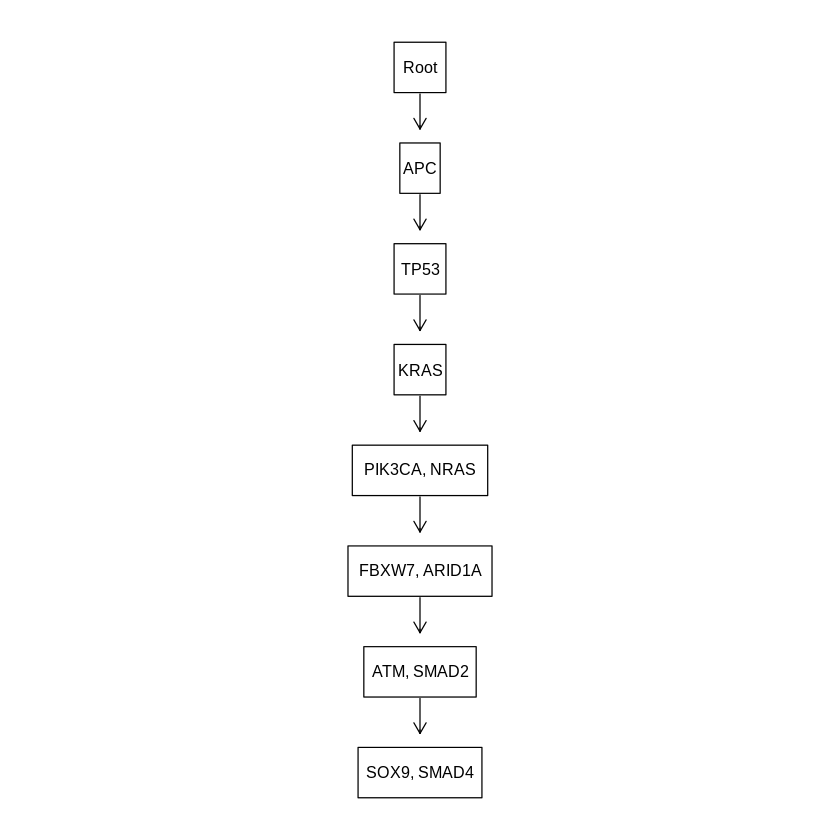

In [3]:
## DAG of restrictions representation
plot(COADREAD_fitness, expandModules = TRUE, autofit = TRUE)



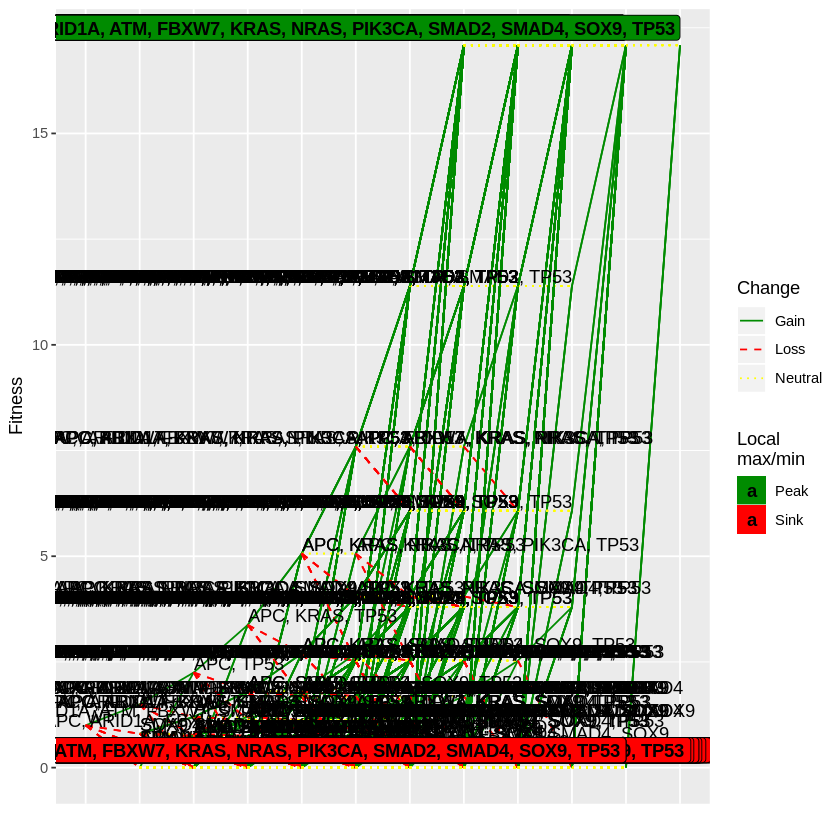

In [4]:
## Evaluation of all possible genotypes fitness 
## under the previous fitness specifications
COADREAD_FL <- evalAllGenotypes(COADREAD_fitness, max = 131072)

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL) 

In [3]:
## Restriction table, including five-modules DAG of
## restrictions specifications and associated fitness
COADREAD_rT_5d <- data.frame(parent = c("Root", "A", "B", "C"), # Parent nodes
                             child = c("A", "B", "C", "D"), # Child nodes
                             s = 0.5, 
                             sh = c(rep(-1, 4)),
                             typeDep = "MN")

## Create fitness specifications from simplified DAG of restrictions
COADREAD_fitness_5d <- allFitnessEffects(COADREAD_rT_5d,
                                         geneToModule = c( "Root" = "Root",
                                                           "A" = "APC",
                                                           "B" = "TP53",
                                                           "C" = "KRAS",
                                                           "D" = "PIK3CA, NRAS"),
                                         drvNames = c("APC", "TP53", "KRAS",
                                                      "PIK3CA", "NRAS"))

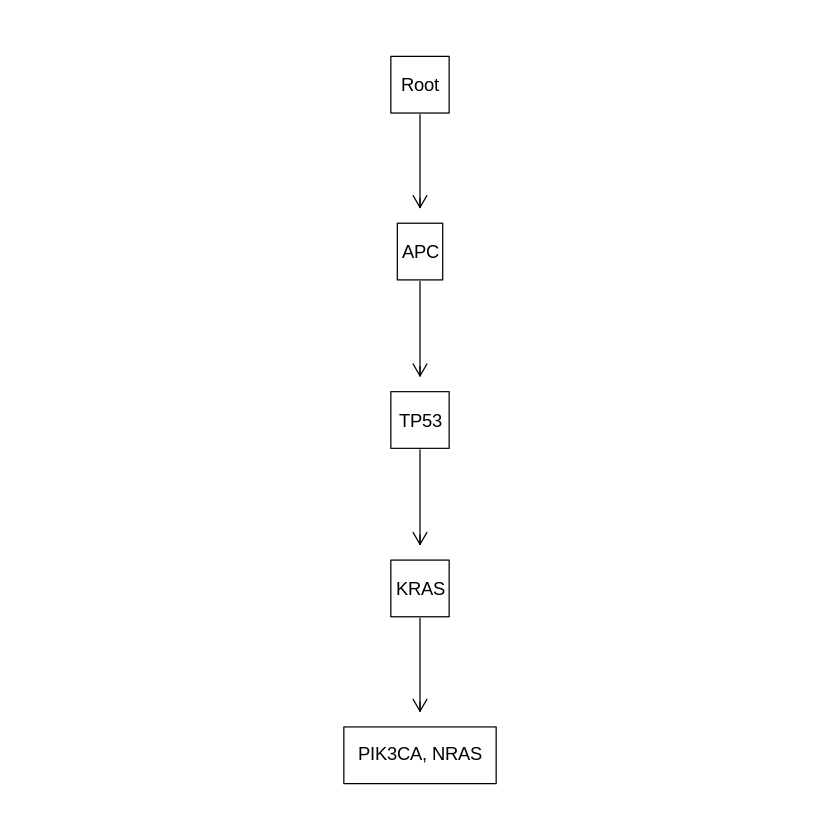

In [4]:
## Simplified DAG of restrictions representation
plot(COADREAD_fitness_5d, expandModules = TRUE, autofit = TRUE)

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

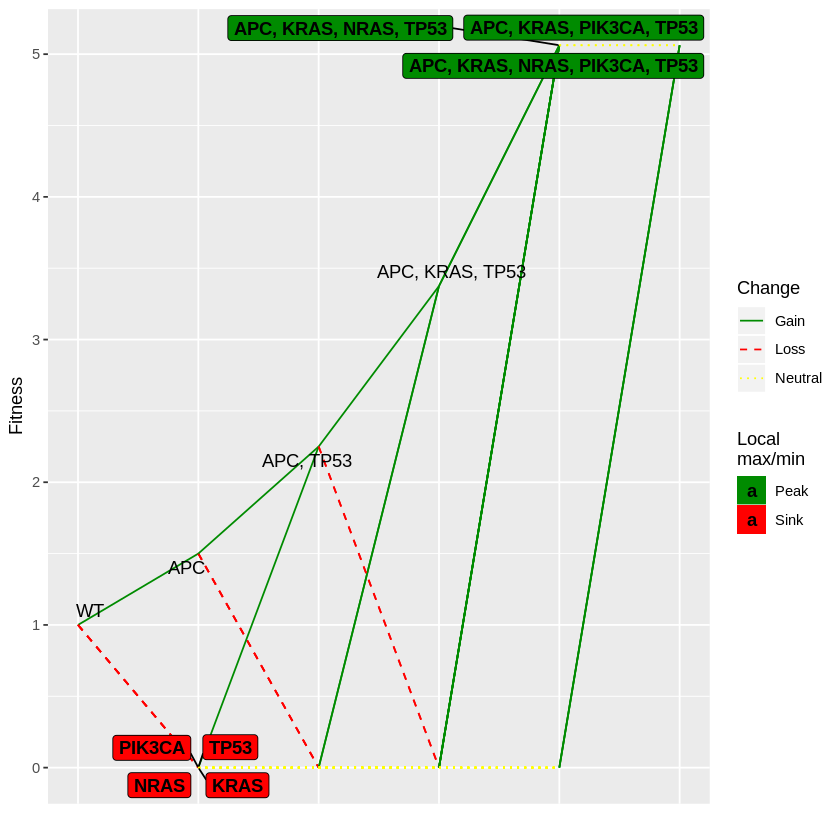

In [5]:
## Evaluation of all possible genotypes fitness under the previous fitness specifications
COADREAD_FL_5d <- evalAllGenotypes(COADREAD_fitness_5d)

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL_5d, use_ggrepel = TRUE) 

## Frequency-dependent fitness

Clones that coexist in a tumor can influence the fitness of each other in a frequency-dependent manner. APC, TP53, KRAS, PIK3CA, NRAS genotype fitness could depend on the frequency of APC, TP53, KRAS, PIK3CA and APC, TP53, KRAS, NRAS genotypes in the context of a competitive relationship among clones for niche nutrients. APC, TP53, KRAS, PIK3CA, NRAS clones would be more energetically demanding and thus, coexistence with other clones would be detrimental

In [10]:
## Mapping of genotypes to frequency-dependent fitness
# Not explicitly mapped genotypes are assigned a fitness of cero
COADREAD_gen_freqdep <- data.frame(
                Genotype = c("WT", "APC","APC, TP53",
                            "APC, TP53, KRAS",
                            "APC, TP53, KRAS, PIK3CA",
                            "APC, TP53, KRAS, NRAS",
                            "APC, TP53, KRAS, PIK3CA, NRAS"),
                            Fitness = c("1", "1.5",
                                        "2.25", "3.375", "5.0625", "5.0625",
              "5.0625 - ((f_APC_TP53_KRAS_PIK3CA + f_APC_TP53_KRAS_NRAS))/2"),
                            stringsAsFactors = FALSE)

## Fitness specifications
COADREAD_fitness_freqdep <- allFitnessEffects(genotFitness = COADREAD_gen_freqdep, 
                                                   frequencyDependentFitness = TRUE,
                                                   frequencyType = "rel")

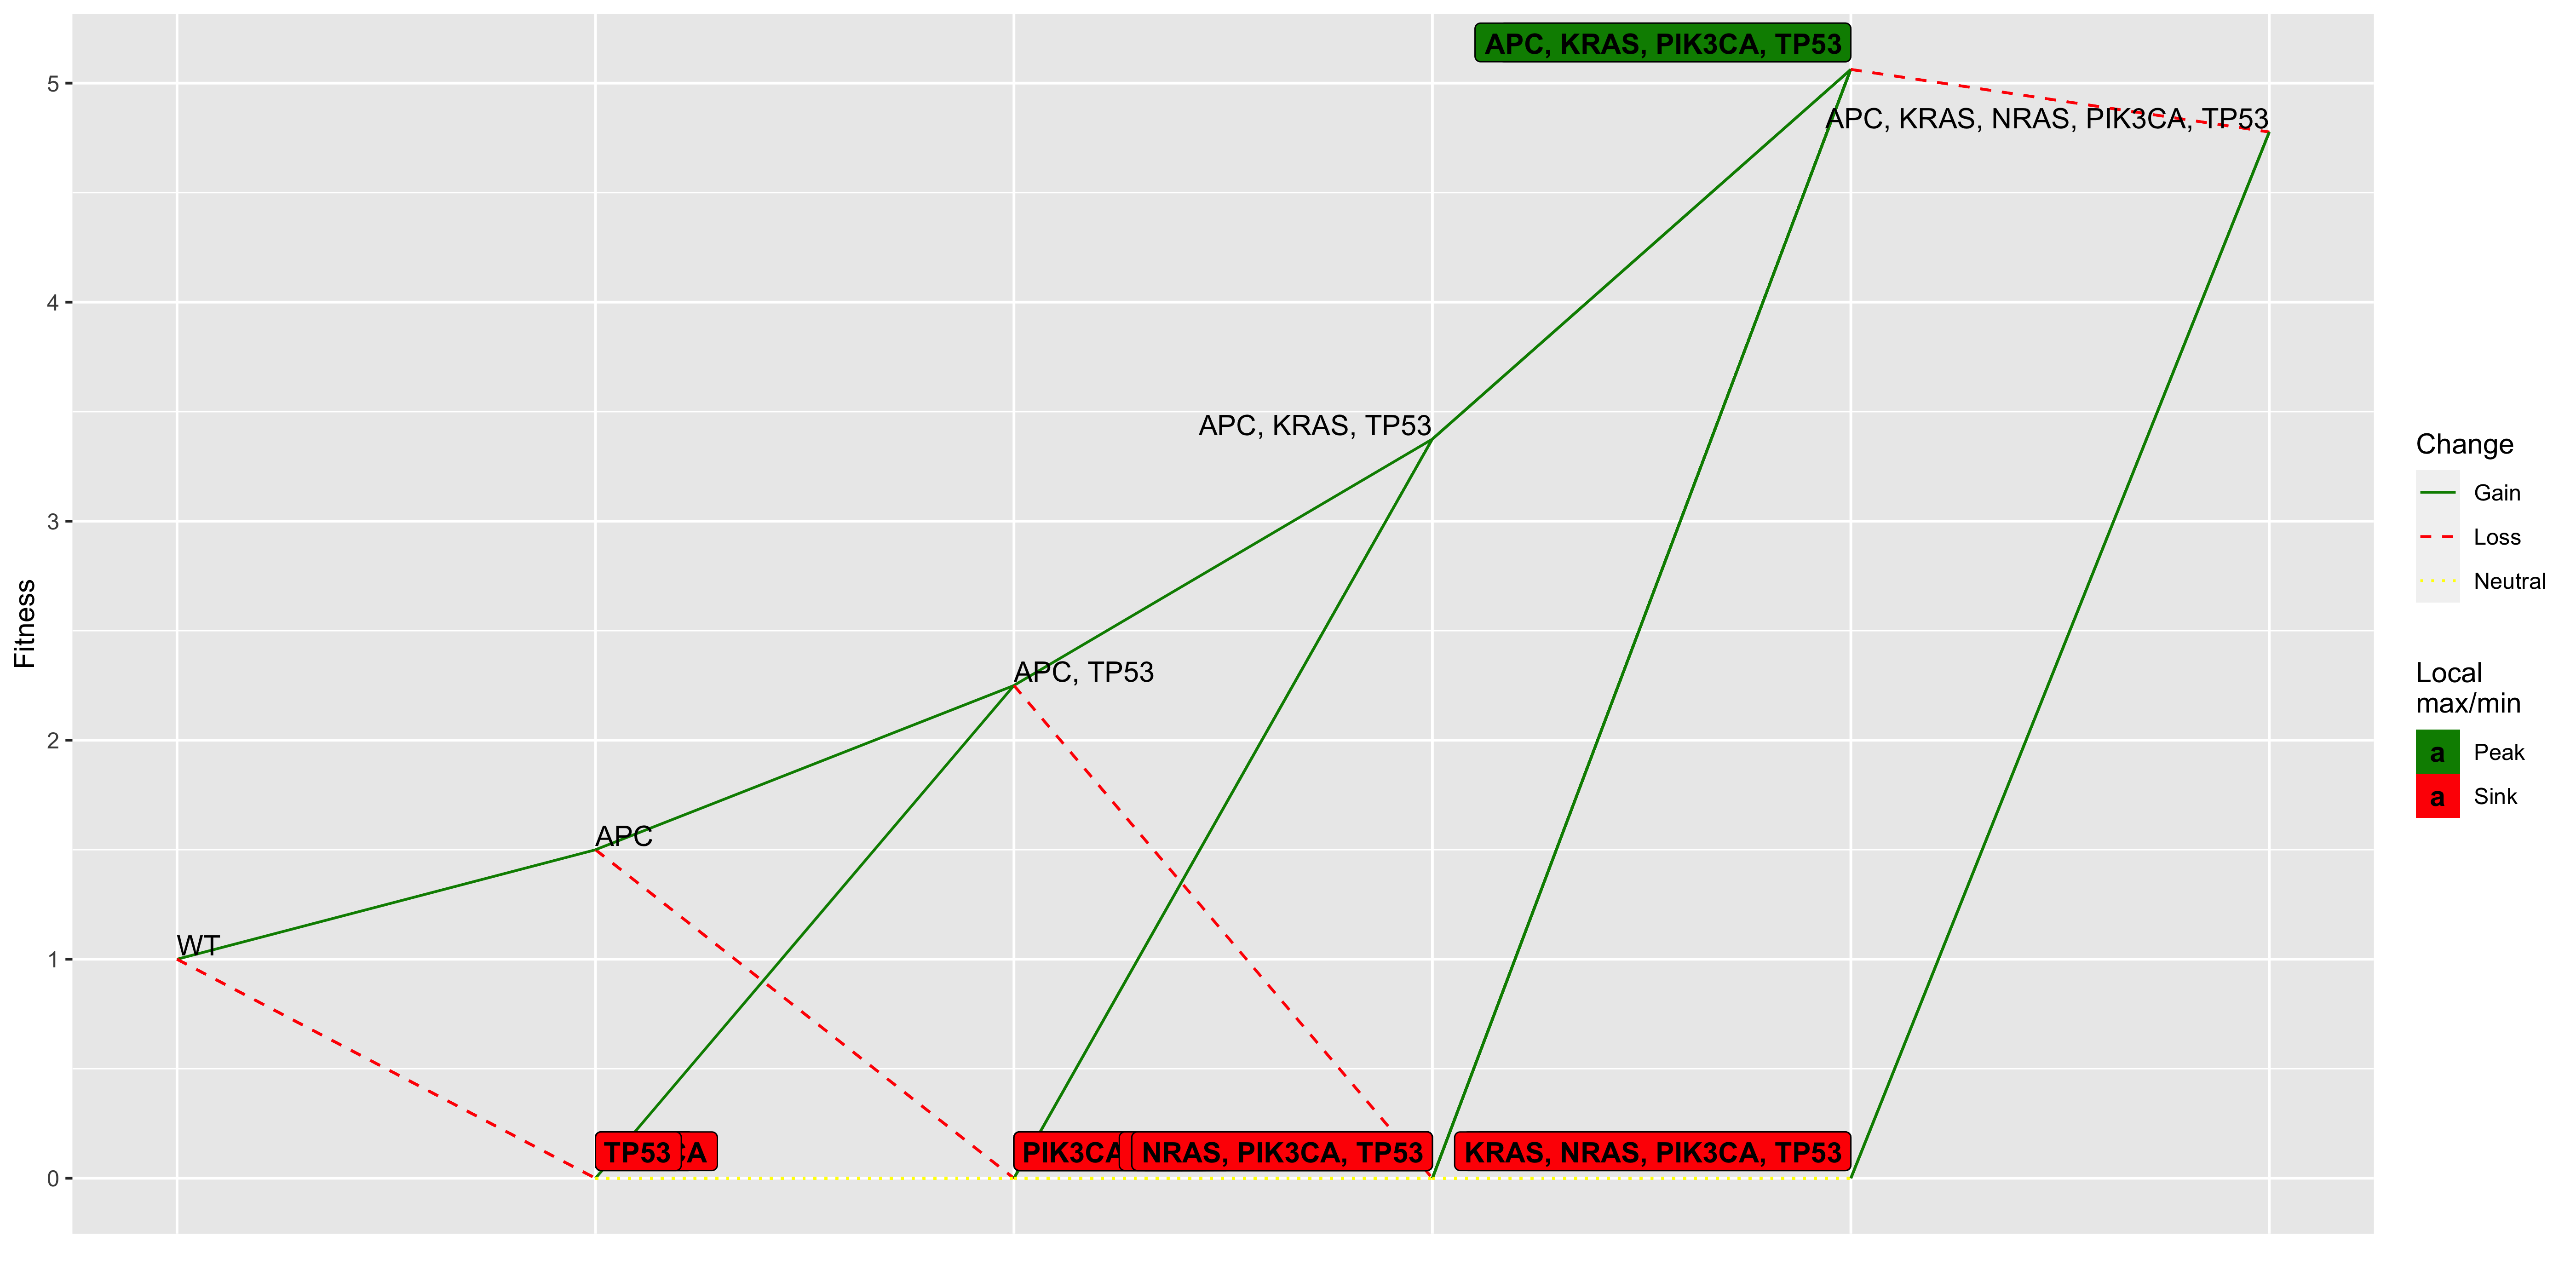

In [42]:
## Evaluate all genotypes considering population sizes of the clones
COADREAD_FL_freqdep <- evalAllGenotypes(COADREAD_fitness_freqdep,
                                 spPopSizes = c("WT" = 5, "APC" = 5, "APC, TP53" = 5,
                                                "APC, TP53, KRAS" = 10,
                                                "APC, TP53, KRAS, PIK3CA" = 50,
                                                "APC, TP53, KRAS, NRAS" = 50,
                                                "APC, TP53, KRAS, PIK3CA, NRAS" = 50))
                                                   

## Fitness landscape representation
plotFitnessLandscape(COADREAD_FL_freqdep)